In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def f(x, y):
    return x**2 + y**2  # 这里是你的函数，你可以替换成你想要的任何函数

In [62]:

def plot_contour_for_f(f, title='MAE'):

    # 创建 x 和 y 值的范围
    x_values = np.linspace(-1, 1, 10)
    y_values = np.linspace(-1, 1, 10)

    # 生成 x 和 y 的网格
    X, Y = np.meshgrid(x_values, y_values)

    # 计算函数值
    Z = f(X, Y)

    # 绘制图像
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, levels=20, cmap='viridis')  # 使用contourf绘制等高线
    plt.colorbar()  # 添加颜色条
    plt.xlabel('Input1')
    plt.ylabel('Input2')
    plt.title(title)
    plt.grid(True)
    plt.savefig('test.jpg')
    plt.show()


In [66]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return x**2 + y**2  # 这里是你的函数，可以替换成你想要的任何函数


def plot_3d_for_f(f,zlabel='MAE for function'):
# 创建 x 和 y 值的范围
    x_values = np.linspace(-1, 1, 20)
    y_values = np.linspace(-1, 1, 20)

    # 生成 x 和 y 的网格
    X, Y = np.meshgrid(x_values, y_values)

    # 计算函数值
    Z = f(X, Y)

    # 绘制3D图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制表面
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # 添加颜色条
    fig.colorbar(surf)

    # 设置标签和标题
    ax.set_xlabel('Input1')
    ax.set_ylabel('Input2')
    ax.set_zlabel('MAE f')
    # ax.set_title('3D Plot of f(x, y)')

    plt.show()


In [89]:

def plot_contour_and_3d_for_f(f, title='MAE',label='mul'):

    # 创建 x 和 y 值的范围
    x_values = np.linspace(-1, 1, 20)
    y_values = np.linspace(-1, 1, 20)

    # 生成 x 和 y 的网格
    X, Y = np.meshgrid(x_values, y_values)

    # 计算函数值
    Z = f(X, Y)

    # 绘制图像
    plt.figure(figsize=(10, 8))
    plt.contourf(X, Y, Z, levels=20, cmap='viridis')  # 使用contourf绘制等高线
    plt.colorbar()  # 添加颜色条
    plt.xlabel('Input1')
    plt.ylabel('Input2')
    plt.title(title)
    plt.grid(True)
    plt.savefig(label+'_countour.jpg')
    plt.show()

    # 绘制3D图
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # 绘制表面
    surf = ax.plot_surface(X, Y, Z, cmap='viridis')

    # 添加颜色条
    fig.colorbar(surf)

    # 设置标签和标题
    ax.set_xlabel('Input1')
    ax.set_ylabel('Input2')
    ax.set_zlabel('MAE')
    # fig.colorbar(surf).set_clim(0, 0.1)
    ax.set_zlim(0,0.1)
    # ax.set_title('3D Plot of f(x, y)')
    plt.savefig(label+'_3d.jpg')
    plt.show()


In [81]:
import torch
from scnn.convertors import F2S, S2F
from scnn.bipolar_functions.operations import *

In [82]:


f2s = F2S(seq_len=1024)

def mae_for_sc_multiplier(x,y,seq_len):
    f2s = F2S(seq_len=seq_len)
    s2f = S2F()
    ground = torch.tensor(x*y)
    e = []
    for i in range(500):
        x_i = f2s(torch.tensor(x))
        y_i = f2s(torch.tensor(y))
        e.append(torch.abs(s2f(mul(x_i,y_i))-ground))
    return torch.sum(torch.stack(e)) / len(e)

def mae_for_sc_multiplier_grid(X, Y, seq_len):
    result = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = X[i, j]
            y = Y[i, j]
            result[i, j] = mae_for_sc_multiplier(x, y, seq_len)
    
    return result


In [83]:
mae_for_sc_multiplier(0.3,0.2,128)

tensor(0.0680)

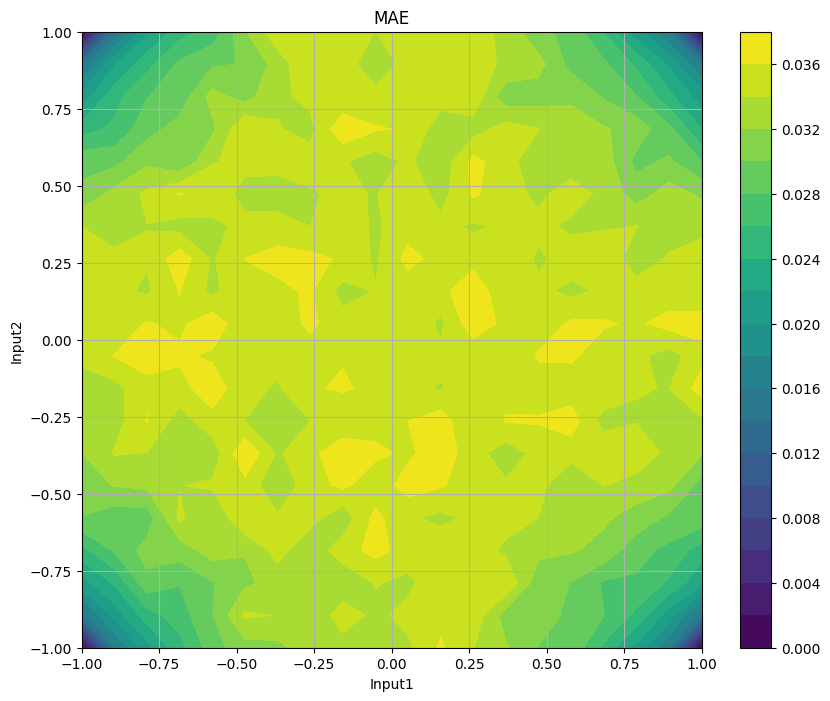

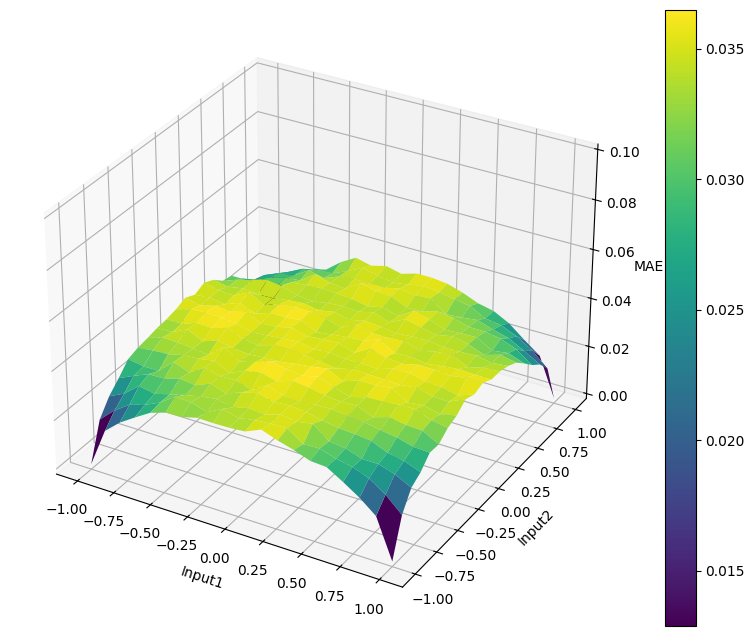

In [91]:
plot_contour_and_3d_for_f(lambda x,y: mae_for_sc_multiplier_grid(x,y,512), label='mul')